# Exercises

This notebook contains exercises for section 2.2 of the Medford group graduate student training. These exercises cover DFT convergence testing in SPARC.

## Exercise 1

We start with the simple example of an isolated atom. Place a single carbon atom in a cubic box with dimension *L* in SPARC. Compute the energy of the system for values of *L* in the interval 2—14 Å with a 1 Å increment. <br>
Determine the minimal dimension of the box you recommend for the study by plotting system energy against *L* in Python using the code below. <br>
Explain why the energy converges to the energy that you determine.

In [39]:
from ase.build import bulk, molecule, surface, add_adsorbate
from ase.constraints import FixAtoms
from ase.io import read
from ase.units import Bohr,Hartree,mol,kcal,kJ,eV
from sparc import SPARC
import numpy as np
import json, os, re

atoms = molecule('C')
atoms.cell = [[10,0,0],[0,10,0],[0,0,10]]
atoms.center()


In [40]:
parameters = dict(
                EXCHANGE_CORRELATION = 'GGA_PBE',
                D3_FLAG=1,   #Grimme D3 dispersion correction
                SPIN_TYP=0,   #non spin-polarized calculation
                KPOINT_GRID=[1,1,1],  #slab needs only 1 kpt in z-direction 
                ECUT=800/Hartree,   #set ECUT (Hartree) or h (Angstrom)
                #h = 0.15,
                TOL_SCF=1e-5,
                RELAX_FLAG=0,
                TOL_RELAX = 2.00E-03,  #convergence criteria (maximum force) (Ha/Bohr)
                PRINT_FORCES=1,
                PRINT_RELAXOUT=1)


cwd = os.getcwd()
eng_list, t_list = [], []

for i in np.arange(2, 15, 1):
    i = int(i)
    dir_i = f"{cwd}/C_gas_lat/calc_{i}"
    
    atoms.cell = [[i,0,0],[0,i,0],[0,0,i]]
    parameters['directory'] = dir_i
    calc = SPARC(atoms = atoms, **parameters)
    atoms.set_calculator(calc)
    eng = atoms.get_potential_energy()
    eng_list.append(eng)

    sparc_out = os.path.join(dir_i, 'SPARC.out')
    with open(sparc_out, 'r') as f: data = f.read()
    t_SPARC = float(re.search(r'Total walltime\s+:\s+([0-9.]+)', data).group(1)) 
    t_SPARC = f"{t_SPARC:.3f}"
    t_list.append(t_SPARC)


json.dump(eng_list, open(f"{cwd}/C_gas_lat/eng_list.json", 'w'))
json.dump(t_list, open(f"{cwd}/C_gas_lat/t_list.json", 'w'))


{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]


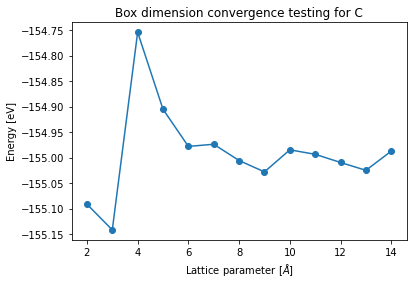

In [41]:
import numpy as np
import pylab as plt

L = np.arange(2,15)
E = [] # FILL THIS IN
E = json.load(open(f"{cwd}/C_gas_lat/eng_list.json", 'r'))

plt.plot(L, E, 'o-');
plt.title('Box dimension convergence testing for C');
plt.xlabel('Lattice parameter [$\AA$]');
plt.ylabel('Energy [eV]');

Energy converges around the lattice parameter of 8 Ang.


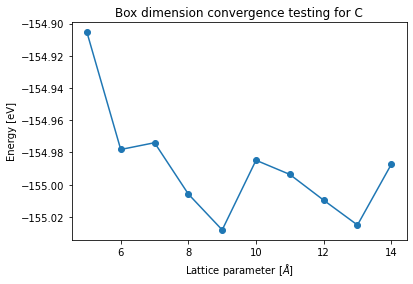

In [42]:
plt.plot(L[3:], E[3:], 'o-');
plt.title('Box dimension convergence testing for C');
plt.xlabel('Lattice parameter [$\AA$]');
plt.ylabel('Energy [eV]');

print("Energy converges around the lattice parameter of 8 Ang.")

## Exercise 2

For a conventional unit cell of FCC copper, compute *per-atom* energies and CPU time 
- at different mesh spacings (h) from 0.1 to 0.2 with an increment of 0.01. 
- at different Energy-cutoff (ECUT) from 500 to 1000 with an increment of 100. 

Determine the optimal mesh spacing in terms of accuracy versus computational cost.

1. Convergence test with respect to the mesh spacing (h)

In [92]:
image = bulk('Cu')

parameters = dict(
                EXCHANGE_CORRELATION = 'GGA_PBE',
                D3_FLAG=1,   #Grimme D3 dispersion correction
                SPIN_TYP=0,   #non spin-polarized calculation
                KPOINT_GRID=[6,6,1],  #slab needs only 1 kpt in z-direction 
                #ECUT=500/Hartree,   #set ECUT (Hartree) or h (Angstrom)
                #h = 0.15,
                TOL_SCF=1e-5,
                RELAX_FLAG=0,
                TOL_RELAX = 2.00E-03,  #convergence criteria (maximum force) (Ha/Bohr)
                PRINT_FORCES=1,
                PRINT_RELAXOUT=1)


cwd = os.getcwd()
eng_list, t_list = [], []

for i in np.arange(0.10, 0.21, 0.01):
    i = round(i, 2)
    dir_i = f"{cwd}/Cu_h/calc_{i}"

    parameters['h'] = i
    parameters['directory'] = dir_i
    calc = SPARC(atoms = image, **parameters)
    image.set_calculator(calc)
    eng = image.get_potential_energy()
    eng_per_atom = eng / len(image)
    eng_list.append(eng_per_atom)

    sparc_out = os.path.join(dir_i, 'SPARC.out')
    with open(sparc_out, 'r') as f: data = f.read()
    t_SPARC = float(re.search(r'Total walltime\s+:\s+([0-9.]+)', data).group(1)) 
    t_SPARC = f"{t_SPARC:.3f}"
    t_list.append(t_SPARC)


json.dump(eng_list, open(f"{cwd}/Cu_h/eng_list.json", 'w'))
json.dump(t_list, open(f"{cwd}/Cu_h/t_list.json", 'w'))


/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key POISSON_SOLVER not in validator's parameter list, ignore value conversion!
  warn(
/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key VERBOSITY not in validator's parameter list, ignore value conversion!
  warn(


{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]


[-0.00885606 -0.01856906 -0.05780291 -0.06200571 -0.08587313 -0.57852629
  0.         -0.74936058 -1.33010422 -2.32592968]
Energy converges around the mesh spacing of 0.1 Ang, which is not practical (< 0.01 eV per atom).


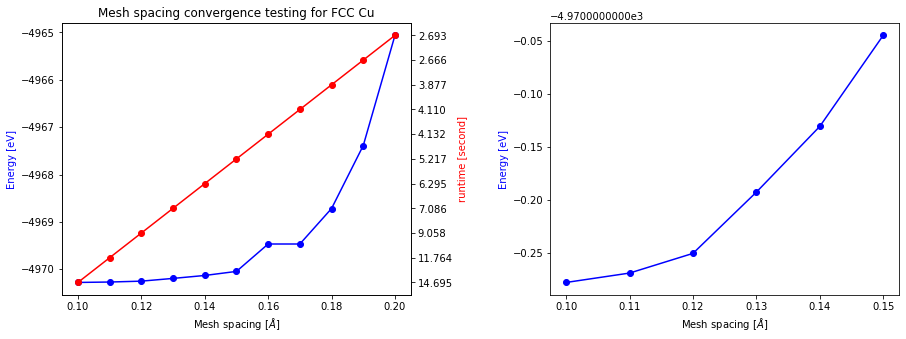

In [93]:
k = np.arange(0.10, 0.21, 0.01)
E = [] # FILL THIS IN
CPU_time = [] # FILL THIS IN
E = json.load(open(f"{cwd}/Cu_h/eng_list.json", 'r'))
CPU_time = json.load(open(f"{cwd}/Cu_h/t_list.json", 'r'))

fig, axs = plt.subplots(1,2, figsize=(15,5))
ax2 = axs[0].twinx();
axs[0].plot(k, E, 'bo-');
ax2.plot(k, CPU_time, 'ro-');

plt.title('Mesh spacing convergence testing for FCC Cu');
axs[0].set_xlabel('Mesh spacing [$\AA$]');
axs[0].set_ylabel('Energy [eV]', color = 'b');
ax2.set_ylabel('runtime [second]', color = 'r');

axs[1].plot(k[:-5], E[:-5], 'bo-');
axs[1].set_xlabel('Mesh spacing [$\AA$]');
axs[1].set_ylabel('Energy [eV]', color = 'b');
plt.subplots_adjust(wspace=0.4)

print(np.array(E[0:-1]) - E[1:])
print("Energy converges around the mesh spacing of 0.1 Ang, which is not practical (< 0.01 eV per atom).")


2. Convergence test with respect to the energy-cutoff (ECUT)

In [94]:
image = bulk('Cu')

parameters = dict(
                EXCHANGE_CORRELATION = 'GGA_PBE',
                D3_FLAG=1,   #Grimme D3 dispersion correction
                SPIN_TYP=0,   #non spin-polarized calculation
                KPOINT_GRID=[6,6,1],  #slab needs only 1 kpt in z-direction 
                #ECUT=500/Hartree,   #set ECUT (Hartree) or h (Angstrom)
                #h = 0.15,
                TOL_SCF=1e-5,
                RELAX_FLAG=0,
                TOL_RELAX = 2.00E-03,  #convergence criteria (maximum force) (Ha/Bohr)
                PRINT_FORCES=1,
                PRINT_RELAXOUT=1)


cwd = os.getcwd()
eng_list, t_list = [], []

for i in np.arange(500, 1200, 100):
    i = round(i, 2)
    dir_i = f"{cwd}/Cu_ECUT/calc_{i}"

    parameters['ECUT'] = i/Hartree
    parameters['directory'] = dir_i
    calc = SPARC(atoms = image, **parameters)
    image.set_calculator(calc)
    eng = image.get_potential_energy()
    eng_per_atom = eng / len(image)
    eng_list.append(eng_per_atom)

    sparc_out = os.path.join(dir_i, 'SPARC.out')
    with open(sparc_out, 'r') as f: data = f.read()
    t_SPARC = float(re.search(r'Total walltime\s+:\s+([0-9.]+)', data).group(1)) 
    t_SPARC = f"{t_SPARC:.3f}"
    t_list.append(t_SPARC)


json.dump(eng_list, open(f"{cwd}/Cu_ECUT/eng_list.json", 'w'))
json.dump(t_list, open(f"{cwd}/Cu_ECUT/t_list.json", 'w'))



/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/calculator.py:471: UserWarning: You have specified one of FD_GRID, ECUT or MESH_SPACING, conversion of h to mesh grid is ignored.
  warn("You have specified one of FD_GRID, ECUT or MESH_SPACING, "
/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key POISSON_SOLVER not in validator's parameter list, ignore value conversion!
  warn(
/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key VERBOSITY not in validator's parameter list, ignore value conversion!
  warn(


{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]


[1.33010422 0.74936058 0.57852629 0.08587313 0.06200571 0.02532168]
Energy converges around the mesh spacing of 0.1 Ang, which is not practical (< 0.01 eV per atom).


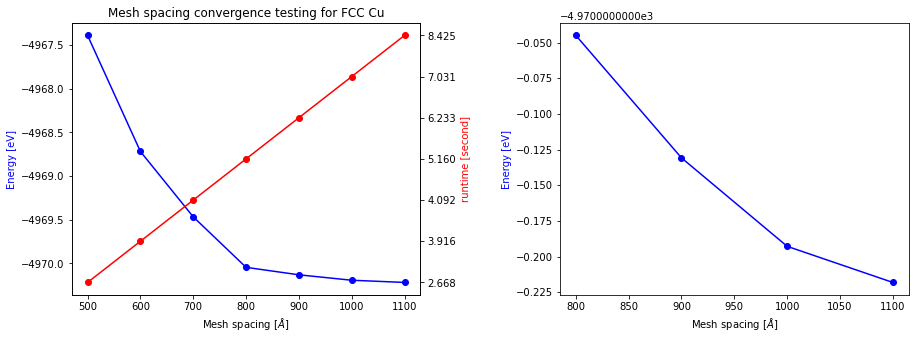

In [116]:
k = np.arange(500, 1200, 100)
E = [] # FILL THIS IN
CPU_time = [] # FILL THIS IN
E = json.load(open(f"{cwd}/Cu_ECUT/eng_list.json", 'r'))
CPU_time = json.load(open(f"{cwd}/Cu_ECUT/t_list.json", 'r'))

fig, axs = plt.subplots(1,2, figsize=(15,5))
ax2 = axs[0].twinx();
axs[0].plot(k, E, 'bo-');
ax2.plot(k, CPU_time, 'ro-');

plt.title('Mesh spacing convergence testing for FCC Cu');
axs[0].set_xlabel('Mesh spacing [$\AA$]');
axs[0].set_ylabel('Energy [eV]', color = 'b');
ax2.set_ylabel('runtime [second]', color = 'r');

axs[1].plot(k[3:], E[3:], 'bo-');
axs[1].set_xlabel('Mesh spacing [$\AA$]');
axs[1].set_ylabel('Energy [eV]', color = 'b');
plt.subplots_adjust(wspace=0.4)

print(np.array(E[0:-1]) - E[1:])
print("Energy converges around the mesh spacing of 0.1 Ang, which is not practical (< 0.01 eV per atom).")



## Exercise 3

For a diamond unit cell, test the convergence of total energy with respect to the k-point mesh and lattice constants. Note that the structures with smaller lattice constants require more dense k-point mesh.

1. Convergence test with respect to the k-point mesh

In [104]:
from ase.spacegroup import crystal

image = bulk('Pt', 'fcc')

parameters = dict(
                EXCHANGE_CORRELATION = 'GGA_PBE',
                D3_FLAG=1,   #Grimme D3 dispersion correction
                SPIN_TYP=0,   #non spin-polarized calculation
                KPOINT_GRID=[4,4,4],  #bulk needs kpoints in all directions
                ECUT=800/Hartree,   #set ECUT (Hartree) or h (Angstrom)
                #h = 0.15,
                TOL_SCF=1e-5,
                RELAX_FLAG=0,
                TOL_RELAX = 2.00E-03,  #convergence criteria (maximum force) (Ha/Bohr)
                PRINT_FORCES=1,
                PRINT_RELAXOUT=1)


cwd = os.getcwd()
eng_list, t_list = [], []

for i in np.arange(1, 10, 1):
    i = round(i, 2)
    dir_i = f"{cwd}/bulk_kpoint/calc_{i}"
    
    #if os.path.isdir(dir_i):
    #    print(f"{dir_i} already exists.")
    #    continue
        
    parameters['KPOINT_GRID'] = [i,i,i]
    parameters['directory'] = dir_i
    calc = SPARC(atoms = image, **parameters)
    image.set_calculator(calc)
    eng = image.get_potential_energy()
    eng_per_atom = eng / len(image)
    eng_list.append(eng_per_atom)

    sparc_out = os.path.join(dir_i, 'SPARC.out')
    with open(sparc_out, 'r') as f: data = f.read()
    t_SPARC = float(re.search(r'Total walltime\s+:\s+([0-9.]+)', data).group(1)) 
    t_SPARC = f"{t_SPARC:.3f}"
    t_list.append(t_SPARC)


json.dump(eng_list, open(f"{cwd}/bulk_kpoint/eng_list.json", 'w'))
json.dump(t_list, open(f"{cwd}/bulk_kpoint/t_list.json", 'w'))




/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/calculator.py:471: UserWarning: You have specified one of FD_GRID, ECUT or MESH_SPACING, conversion of h to mesh grid is ignored.
  warn("You have specified one of FD_GRID, ECUT or MESH_SPACING, "
/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key POISSON_SOLVER not in validator's parameter list, ignore value conversion!
  warn(
/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key VERBOSITY not in validator's parameter list, ignore value conversion!
  warn(


{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]


[-9.11363632 -0.62301044  0.57935548 -0.25886887  0.30712248 -0.04445604
  0.03200741  0.027006  ]
Energy converges around the k-mesh of [9,9,9] (~ 0.01 eV per atom).


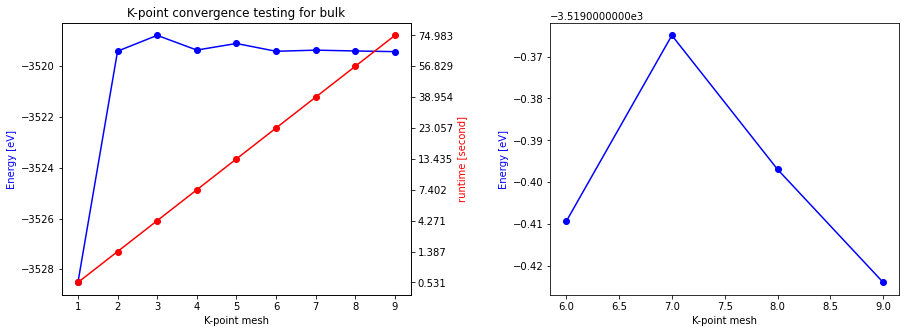

In [108]:
import numpy as np
import pylab as plt

k = np.arange(1, 10, 1)
E = [] # FILL THIS IN
CPU_time = [] # FILL THIS IN
E = json.load(open(f"{cwd}/bulk_kpoint/eng_list.json", 'r'))
CPU_time = json.load(open(f"{cwd}/bulk_kpoint/t_list.json", 'r'))

fig, axs = plt.subplots(1,2, figsize=(15,5));
ax2 = axs[0].twinx();
axs[0].plot(k, E, 'bo-');
ax2.plot(k, CPU_time, 'ro-');

plt.title('K-point convergence testing for bulk');
axs[0].set_xlabel('K-point mesh');
axs[0].set_ylabel('Energy [eV]', color = 'b');
ax2.set_ylabel('runtime [second]', color = 'r');

axs[1].plot(k[5:], E[5:], 'bo-');

plt.subplots_adjust(wspace=0.4)
axs[1].set_xlabel('K-point mesh');
axs[1].set_ylabel('Energy [eV]', color = 'b');

print(np.array(E[0:-1]) - E[1:])
print("Energy converges around the k-mesh of [9,9,9] (~ 0.01 eV per atom).")


2. Convergence test with respect to the lattice constants

In [115]:
#image = bulk('Pt', 'fcc')

parameters = dict(
                EXCHANGE_CORRELATION = 'GGA_PBE',
                D3_FLAG=1,   #Grimme D3 dispersion correction
                SPIN_TYP=0,   #non spin-polarized calculation
                KPOINT_GRID=[7,7,7],  #bulk needs kpoints in all directions
                ECUT=800/Hartree,   #set ECUT (Hartree) or h (Angstrom)
                #h = 0.15,
                TOL_SCF=1e-5,
                RELAX_FLAG=0,
                TOL_RELAX = 2.00E-03,  #convergence criteria (maximum force) (Ha/Bohr)
                PRINT_FORCES=1,
                PRINT_RELAXOUT=1)


cwd = os.getcwd()
eng_list, t_list = [], []

for i in np.arange(0.95, 1.05, 0.01):
    i = round(i, 2)
    dir_i = f"{cwd}/bulk_lattice/calc_{i}"
    
    image = bulk('Pt', 'fcc')
    image.set_cell(image.get_cell() * i, scale_atoms=True)
    
    parameters['directory'] = dir_i
    calc = SPARC(atoms = image, **parameters)
    image.set_calculator(calc)
    eng = image.get_potential_energy()
    eng_per_atom = eng / len(image)
    eng_list.append(eng_per_atom)

    sparc_out = os.path.join(dir_i, 'SPARC.out')
    with open(sparc_out, 'r') as f: data = f.read()
    t_SPARC = float(re.search(r'Total walltime\s+:\s+([0-9.]+)', data).group(1)) 
    t_SPARC = f"{t_SPARC:.3f}"
    t_list.append(t_SPARC)


json.dump(eng_list, open(f"{cwd}/bulk_lattice/eng_list.json", 'w'))
json.dump(t_list, open(f"{cwd}/bulk_lattice/t_list.json", 'w'))





/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/calculator.py:471: UserWarning: You have specified one of FD_GRID, ECUT or MESH_SPACING, conversion of h to mesh grid is ignored.
  warn("You have specified one of FD_GRID, ECUT or MESH_SPACING, "
/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key POISSON_SOLVER not in validator's parameter list, ignore value conversion!
  warn(
/home/hice1/nyu49/.local/lib/python3.9/site-packages/sparc/sparc_parsers/utils.py:56: UserWarning: Key VERBOSITY not in validator's parameter list, ignore value conversion!
  warn(


{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]
{}
[0] [0]


[ 0.158923    0.1192509   0.08677243  0.05001993  0.02085634 -0.0024559
 -0.02128931 -0.0374469  -0.05824511 -0.07316655]
Energy converges at the lattice constant multiplier of 1.00 (the lowest energy).


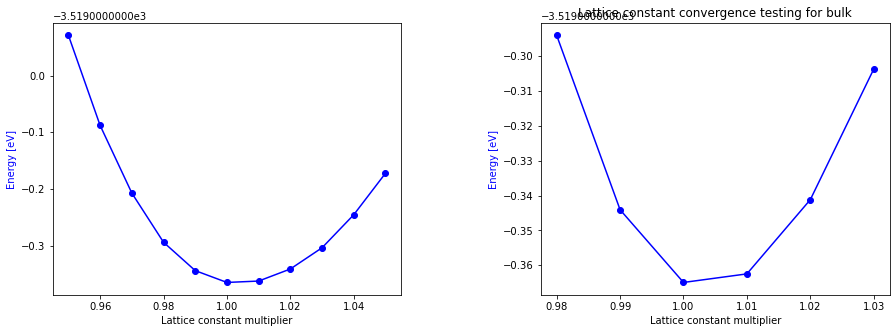

In [124]:
import numpy as np
import pylab as plt

k = np.arange(0.95, 1.05, 0.01)
E = [] # FILL THIS IN
CPU_time = [] # FILL THIS IN
E = json.load(open(f"{cwd}/bulk_lattice/eng_list.json", 'r'))
CPU_time = json.load(open(f"{cwd}/bulk_lattice/t_list.json", 'r'))

fig, axs = plt.subplots(1,2, figsize=(15,5));
#ax2 = axs[0].twinx();
axs[0].plot(k, E, 'bo-');
#ax2.plot(k, CPU_time, 'ro-');

plt.title('Lattice constant convergence testing for bulk');
axs[0].set_xlabel('Lattice constant multiplier');
axs[0].set_ylabel('Energy [eV]', color = 'b');
#ax2.set_ylabel('runtime [second]', color = 'r');

axs[1].plot(k[3:-2], E[3:-2], 'bo-');

plt.subplots_adjust(wspace=0.4)
axs[1].set_xlabel('Lattice constant multiplier');
axs[1].set_ylabel('Energy [eV]', color = 'b');

print(np.array(E[0:-1]) - E[1:])
print("Energy converges at the lattice constant multiplier of 1.00 (the lowest energy).")

